# Lung Cancer Prediction 
By: Kyle Hostetter

# Data Infomation

The effectiveness of cancer prediction system helps the people to know their cancer risk with low cost and it also helps the people to take the appropriate decision based on their cancer risk status. The data is collected from the website online lung cancer prediction system .

### Columns

* Gender- M(male), F(female)
* Age- Age of the patient
* Smoking- YES=2 , NO=1.
* Yellow fingers- YES=2 , NO=1.
* Anxiety- YES=2 , NO=1.
* Peer_pressure- YES=2 , NO=1.
* Chronic Disease- YES=2 , NO=1.
* Fatigue- YES=2 , NO=1.
* Allergy- YES=2 , NO=1.
* Wheezing- YES=2 , NO=1.
* Alcohol- YES=2 , NO=1.
* Coughing- YES=2 , NO=1.
* Shortness of Breath- YES=2 , NO=1.
* Swallowing Difficulty- YES=2 , NO=1.
* Chest pain- YES=2 , NO=1.
* Lung Cancer- YES , NO.

# Self Made Functions

In [1]:
'''
Self Made Functions-
I tend to use this functions alot so I have imported them for easier use. :-)
'''
def CategoricalVisualizations(figsize, title, rows, columns, dataFrame, cat_columns):
  '''
  Description: This is create a figure with subplots for distribution of
               categorical columns.
  figsize= Height and width of figure size.
  title= Title of figure.
  rows= Number of rows in figure.
  columns= Number of columns in figure. 
  dataFrame= DataFrame of values.
  cat_columns= List of categorical columns.
  '''
  # Choose Size of Chart
  plt.figure(figsize=figsize)
  plt.suptitle(title)

  for i in range(0,len(cat_columns)):
    
    # Iterate through subplots
    plt.subplot(rows,columns,i+1)

    # Plot CountPlot
    sns.countplot(data=dataFrame,               # DataFrame of values
                  x=dataFrame[cat_columns[i]],  # Column Name
                  order=df[cat_columns[i]].value_counts().sort_values(ascending=True).index)  # Order of values

def ContinuousVisulaizations(figsize, title, rows, columns, dataFrame, con_columns):
  '''
  Description: This is create a figure with subplots for distribution of
               continuous columns.
  figsize= Height and width of figure size.
  title= Title of figure.
  rows= Number of rows in figure.
  columns= Number of columns in figure. 
  dataFrame= DataFrame of values.
  con_columns= List of continuous column names.
  '''
  # Choose Size of Chart
  plt.figure(figsize=figsize)
  plt.suptitle(title)

  for i in range(0,len(con_columns)):

    # Statisical Computations
    mean = dataFrame[con_columns[i]].mean()     # Calculate mean for column
    median = dataFrame[con_columns[i]].median() # Calculate median for column

    # Calculate lower and higher outlier range
    low_outliers = mean - dataFrame[con_columns[i]].std()*3   # Calcualte lower outliers     
    high_outliers = mean + dataFrame[con_columns[i]].std()*3  # Calculate upper ouliers

    # Iterate through subplots
    plt.subplot(rows,columns,i+1)

    # Plot Histograms
    sns.histplot(data=dataFrame,    # DataFrame  
                 x=con_columns[i],  # Column Name
                 kde=True)          # Show KDE Distribution

    # If outliers are below 0 do no show lower outlier line
    if low_outliers > 0:
      plt.axvline(low_outliers, color='r')

    # Plot Statisical Metrics on chart
    plt.axvline(mean, color='g')
    plt.axvline(median, color='orange')
    plt.axvline(high_outliers, color='r')

def ClassifierMetrics(X_train, y_train, X_test, y_test):
  '''
  Description: This will perform a varity of Classification Algorithms 
               on the provided datasets. 

  X_train: Array of training features.
  y_train: Array of target values. 
  X_test: Testing feature array for validation.
  y_test: Testing value array for validation.
  '''
  # Machine Learning Classifiers
  classifiers = [ SVC(random_state=0),
                  GaussianNB(), 
                  XGBClassifier(random_state=0), 
                  MLPClassifier(random_state=0), 
                  LGBMClassifier(random_state=0),
                  LogisticRegression(random_state=0),
                  AdaBoostClassifier(random_state=0),  
                  KNeighborsClassifier(),  
                  DecisionTreeClassifier(random_state=0),       
                  RandomForestClassifier(random_state=0), 
                  QuadraticDiscriminantAnalysis()]     

  # Classifier Names
  classifier_name = [ 'SVC',
                      'GaussianNB', 
                      'XGBClassifier',
                      'MLPClassifier',
                      'LGBMClassifier',
                      'LogisticRegression',
                      'AdaBoostClassifier',  
                      'KNeighborsClassifier',  
                      'DecisionTreeClassifier',       
                      'RandomForestClassifier', 
                      'QuadraticDiscriminantAnalysis']

  # DataFrame of Trained Results
  trained_results = pd.DataFrame()
  test_results = pd.DataFrame()

  # Arrays for Training Results
  trained_auc = [] * len(classifiers)
  trained_time = [] * len(classifiers)
  trained_recall = [] * len(classifiers)
  trained_accuracy = [] * len(classifiers)
  trained_f1_score = [] * len(classifiers)
  trained_precision = [] * len(classifiers)

  # Arrays for Test Results
  test_auc = [] * len(classifiers)
  test_recall = [] * len(classifiers)
  test_accuracy = [] * len(classifiers)
  test_f1_score = [] * len(classifiers)
  test_precision = [] * len(classifiers)


  # Loop through all classifiers and find best performing alogrithm
  for i in range(0,len(classifiers)):

    # Assign and Start time
    start_time = time.time()         # Start time for model trainin & prediction
    trained_model = classifiers[i]   # Assign Model  

    # Train using Cross Validation
    y_train_pred = cross_val_predict(trained_model, X_train, y_train, cv=5)

    # Predict Test Data
    trained_model.fit(X_train, y_train)
    y_test_pred = trained_model.predict(X_test)

    # Calcualte & Insert Train time
    end_time = time.time()               # End Time
    total_time = end_time - start_time   # Calculate total time taken
    trained_time.insert(i,round(total_time, 1))    # Insert data into list

    # Insert Training Metrics into arrays
    trained_auc.insert(i, roc_auc_score(y_train, y_train_pred))
    trained_recall.insert(i, recall_score(y_train, y_train_pred))
    trained_accuracy.insert(i, accuracy_score(y_train, y_train_pred))
    trained_f1_score.insert(i, f1_score(y_train, y_train_pred))
    trained_precision.insert(i, precision_score(y_train, y_train_pred))

    # Insert Testing Metrics into arrys
    test_auc.insert(i, roc_auc_score(y_test, y_test_pred))
    test_recall.insert(i, recall_score(y_test, y_test_pred))
    test_accuracy.insert(i, accuracy_score(y_test, y_test_pred))
    test_f1_score.insert(i, f1_score(y_test, y_test_pred))
    test_precision.insert(i, precision_score(y_test, y_test_pred))

  # Add data into Training DataFrame
  trained_results['Model'] = np.array(classifier_name)
  trained_results['Recall'] = np.array(trained_recall)
  trained_results['AUC'] = np.array(trained_auc)
  trained_results['F1_Score'] = np.array(trained_f1_score)
  trained_results['Accuracy'] = np.array(trained_accuracy)
  trained_results['Precision'] = np.array(trained_precision)
  trained_results['Time_Taken'] = np.array(trained_time)

  # Add data into Testing DataFrame 
  test_results['Model'] = np.array(classifier_name)
  test_results['Recall'] = np.array(test_recall)
  test_results['AUC'] = np.array(test_auc)
  test_results['F1_Score'] = np.array(test_f1_score)
  test_results['Accuracy'] = np.array(test_accuracy)
  test_results['Precision'] = np.array(test_precision)

  # Order Training Results
  trained_results = trained_results.sort_values(by='AUC', ascending=False)

  # Order Testing Results
  test_results = test_results.sort_values(by='AUC', ascending=False)

  # Print Results for training
  print('Training Metrics')
  print('-'*87)
  display(trained_results)

  # Print Results for Testing 
  print('\n\n')
  print('Test Metrics')
  print('-'*75)
  display(test_results)

def SeriesStandardScaler(dataFrame, column):
  '''
  Description: This will standarize and scale the column of a dataframe. 

  dataFrame= The dataframe that this column is found in. 
  column= The column of the dataframe that needs to be standardized and scaled. 
  '''
  # Compute Statistics
  mean = dataFrame[column].mean()
  standard_deviation = dataFrame[column].std()

  # Standardize Column
  dataFrame[column] = (dataFrame[column] - mean) / standard_deviation
  return dataFrame[column]

def PrecisionRecallAnalysis(y_true, y_proba):
  '''
  Description: This will produce two charts that to give visualization to 
               precision and recall.
  
  y_true: The true values.
  y_proba: The associated probabilies for making predicitons on y_true. 
  '''
  # Precision Recall Analysis 
  precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba[:,1])

  # Set size of graph
  plt.figure(figsize=(16, 7))  
  plt.suptitle('Precision vs. Recall Analysis')

  # Create First plot
  plt.subplot(1,2,1)
  plt.title('Precision & Recall VS. Threshold')
  plt.xlabel("Threshold")
  plt.ylabel('Precision & Recall')
  line1 = sns.lineplot(x = thresholds, y = precisions[:-1], color='b', lw=2)
  line2 = sns.lineplot(x = thresholds , y = recalls[:-1], color='g', lw=2)
  
  # Set Lines to dashes
  line1.lines[0].set_linestyle("--")
  line1.lines[1].set_linestyle("--")

  # Create Presicion VS. Recall Plot
  plt.subplot(1,2,2)
  plt.title('Precision VS. Recall')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  sns.lineplot(x=recalls[:-1], y=precisions[:-1], lw=2)

# Import Libraries & Data Preprocessing

In [ ]:
# Attach Google Drive to Colab Notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
'''
Title: Heart Failure Prediction System
Author: Kyle Hostetter
Date: 2023-17-02
Description: A simple classifiacation of the Lung Cancer.
'''

# Import Core Libraries
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import Metric & Preprocessing Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.metrics import roc_auc_score, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

# Import Machine Learning Libraries
from sklearn.svm import SVC
from xgboost import XGBClassifier 
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Import Warning Libaries
from warnings import simplefilter

# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
# Set Theme for graphs
sns.set_theme(palette='bright')

# Put Data into Dataframe
df = pd.read_csv('/content/drive/MyDrive/KaggleDataSets/LungCancer.csv')
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [ ]:
# Columns with continuous values
con_df = ['AGE']

# Columns with categorical values
cat_df = ['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
          'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 
          'WHEEZING','ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
          'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']

# Map 'YES' or 'NO' into categorical values. EXCEPT: Gender & LUNG_CANCER 
for col in cat_df[1:-1]:
  df[col] = df[col].map({1:'No', 2:'Yes'})

# Map Gender Column for 
df['GENDER'] = df['GENDER'].map({'F':'Female','M':'Male'})

# Map for uniformitity in the dataframe
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'NO':'No','YES':'Yes'})

# Print out new mapped dataframe
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Male,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1,Male,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes
2,Female,59,No,No,No,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No
3,Male,63,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,Yes,Yes,No
4,Female,63,No,Yes,No,No,No,No,No,Yes,No,Yes,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,Female,56,No,No,No,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,Yes
305,Male,70,Yes,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes
306,Male,58,Yes,No,No,No,No,No,Yes,Yes,Yes,Yes,No,No,Yes,Yes
307,Male,67,Yes,No,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes


# Visualizations

<AxesSubplot:title={'center':'Distribution of Age by Gender'}, xlabel='AGE', ylabel='Count'>

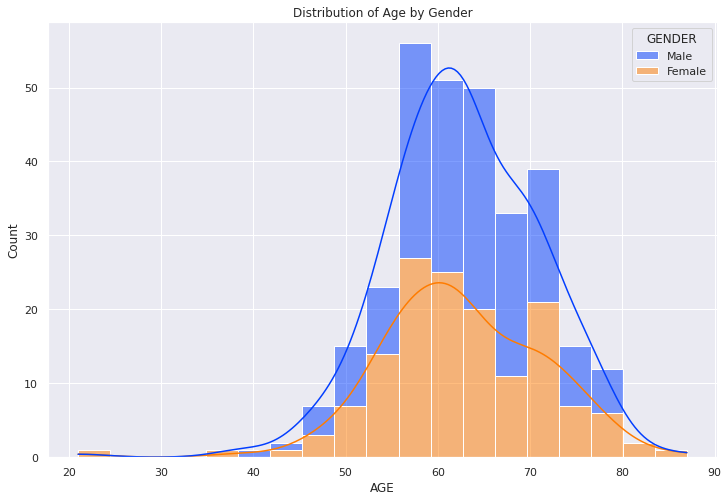

In [ ]:
# Choose size of graph
plt.figure(figsize=(12,8))

#Title of graph
plt.title('Distribution of Age by Gender')

# Create Histogram
sns.histplot(data=df,           # Dataframe of data
             x='AGE',           # Choose anaylsis on AGE column
             multiple='stack',  # Allow multiple hues to show 
             hue='GENDER',      # Show both genders
             kde=True)          # Give a kde curve

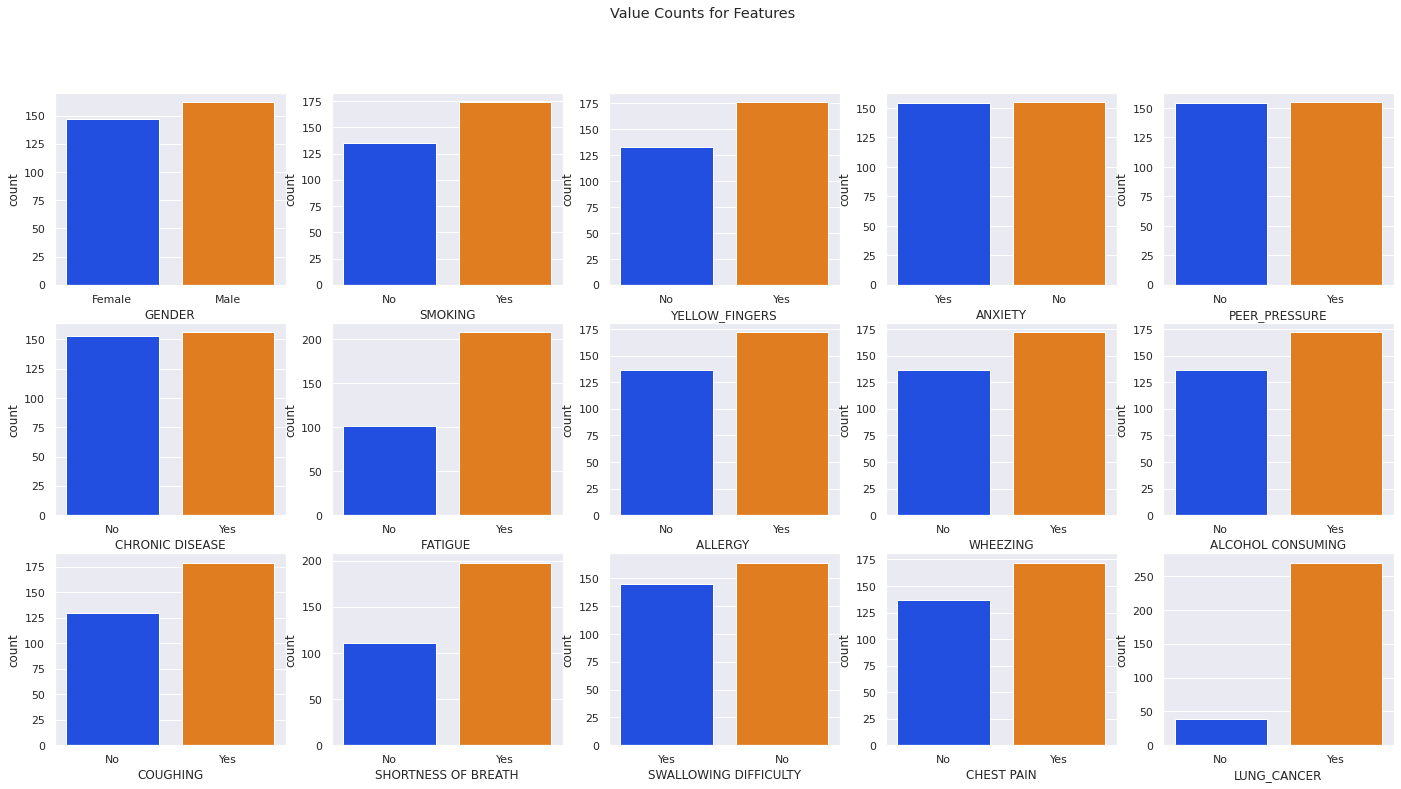

In [ ]:
# Categorical Visualizations
CategoricalVisualizations(figsize=(24, 12),
                          title='Value Counts for Features',
                          rows=3,
                          columns=5, 
                          dataFrame=df,
                          cat_columns=cat_df)

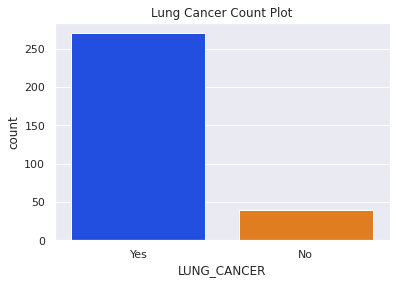


 Value Count Percentages
-----------------------
Yes    87.378641
No     12.621359
Name: LUNG_CANCER, dtype: float64


In [ ]:
# Visualize Data Amounts 
plt.title('Lung Cancer Count Plot')
sns.countplot(data=df,
              x='LUNG_CANCER')
plt.show()

# Print Value Percentages in the dataset
print('\n Value Count Percentages')
print('-'*23)
print(df['LUNG_CANCER'].value_counts() / len(df) *100)

We have to keep in mind that this could pose a problem in sampling. Since we have more than 6x the amount of positive lung cancer cases than negative. So we are going to most likely have to resample the data in order to combat this. 

# Data Preprocessing

In [ ]:
# Remap data into 0s and 1s for manual hot encoding

# Map 'YES' or 'NO' into categorical values. EXCEPT: Gender
for col in cat_df[1:-1]:
  df[col] = df[col].map({'No':0,'Yes':1})

# Map Gender & Lung Cancer column
df['GENDER'] = df['GENDER'].map({'Female':0,'Male':1})
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'No':0,'Yes':1})

# Standardize the Continuous Age Column
df['AGE'] = SeriesStandardScaler(df, 'AGE')

# Show final Dataframe before Test Train Split
display(df)

# Assign Data for Features and Targets
X = df.drop(columns='LUNG_CANCER')
y = df['LUNG_CANCER']

# Seperate into Training and Testing Set
X_train, X_test, y_train, y_test = train_test_split(X,                  # Features
                                                    y,                  # Targets
                                                    test_size=0.2,      # Amount of testing data
                                                    random_state = 0)   # Set random seed


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,0.770600,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,1.379591,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,-0.447382,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,0.039811,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,0.039811,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,-0.812776,0,0,0,1,1,1,0,0,1,1,1,1,0,1
305,1,0.892399,1,0,0,0,0,1,1,1,1,1,1,0,1,1
306,1,-0.569180,1,0,0,0,0,0,1,1,1,1,0,0,1,1
307,1,0.527004,1,0,1,0,0,1,1,0,1,1,1,0,1,1


# Machine Learning

In [ ]:
ClassifierMetrics(X_train, y_train, X_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

Training Metrics
---------------------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


,Model,Recall,AUC,F1_Score,Accuracy,Precision,Time_Taken
1,GaussianNB,0.940367,0.746046,0.940367,0.894737,0.940367,0.1
5,LogisticRegression,0.972477,0.710376,0.950673,0.910931,0.929825,0.1
2,XGBClassifier,0.954128,0.701202,0.941176,0.894737,0.928571,2.3
6,AdaBoostClassifier,0.949541,0.698909,0.938776,0.890688,0.928251,0.7
8,DecisionTreeClassifier,0.912844,0.680560,0.919169,0.858300,0.925581,0.0
4,LGBMClassifier,0.958716,0.669013,0.939326,0.890688,0.920705,0.3
7,KNeighborsClassifier,0.977064,0.660946,0.946667,0.902834,0.918103,0.1
9,RandomForestClassifier,0.967890,0.656359,0.941964,0.894737,0.917391,1.4
10,QuadraticDiscriminantAnalysis,0.931193,0.655252,0.924829,0.866397,0.918552,0.0
0,SVC,0.977064,0.643705,0.944568,0.898785,0.914163,0.1





Test Metrics
---------------------------------------------------------------------------


,Model,Recall,AUC,F1_Score,Accuracy,Precision
10,QuadraticDiscriminantAnalysis,0.961538,0.780769,0.943396,0.903226,0.925926
6,AdaBoostClassifier,1.000000,0.750000,0.954128,0.919355,0.912281
3,MLPClassifier,0.980769,0.740385,0.944444,0.903226,0.910714
5,LogisticRegression,0.980769,0.740385,0.944444,0.903226,0.910714
8,DecisionTreeClassifier,0.980769,0.740385,0.944444,0.903226,0.910714
9,RandomForestClassifier,0.980769,0.740385,0.944444,0.903226,0.910714
1,GaussianNB,0.942308,0.721154,0.924528,0.870968,0.907407
2,XGBClassifier,0.980769,0.690385,0.935780,0.887097,0.894737
4,LGBMClassifier,0.980769,0.690385,0.935780,0.887097,0.894737
0,SVC,0.980769,0.640385,0.927273,0.870968,0.879310


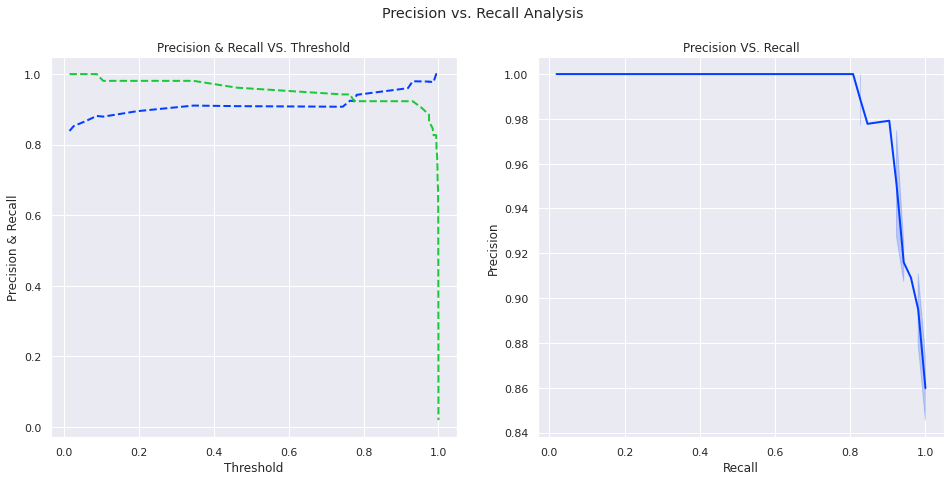

In [ ]:
# Best Performing Model in Above tests
final_model = GaussianNB()

# Fit model to Training Data
final_model.fit(X_train, y_train)
y_scores = final_model.predict_proba(X_test)

# Show Precision & Recall Analysis
PrecisionRecallAnalysis(y_test, y_scores)

After looking at the chart here we can see that he optimized threshold setting for both parameters would have to be around 0.77.

,Coefficients
CHRONIC DISEASE,0.019355
ALCOHOL CONSUMING,0.019355
COUGHING,0.019355
SWALLOWING DIFFICULTY,0.016129
FATIGUE,0.012903
WHEEZING,0.012903
CHEST PAIN,0.012903
GENDER,0.009677
PEER_PRESSURE,0.009677
AGE,0.006452


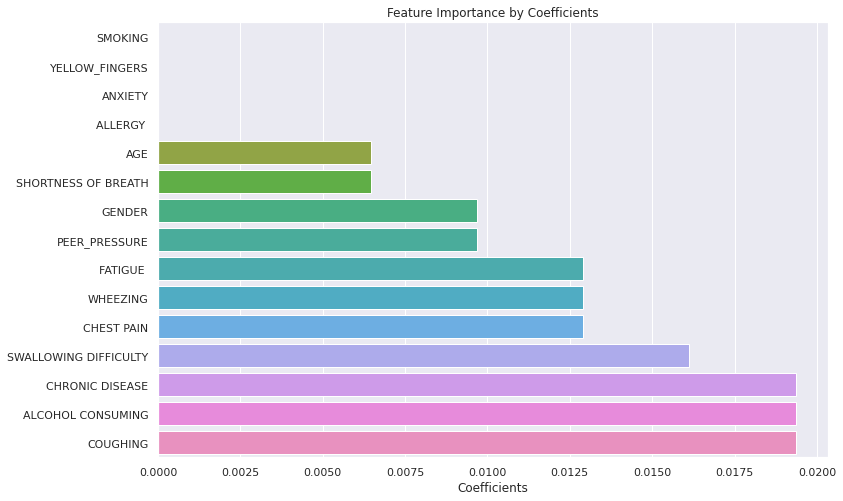

In [ ]:
# Assign Importance of features to variable
imps = permutation_importance(final_model, X_test, y_test)
importances = abs(imps.importances_mean)

# Create DataFrame for Scoring
df_Scores = pd.DataFrame(data=importances, index=X_train.columns, columns=['Coefficients'])

# Order DataFrame
df_Scores = df_Scores.sort_values(by='Coefficients', ascending=True)

# Choose size of chart
plt.figure(figsize=(12,8))

# Plot Bar chart of important features
sns.barplot(data=df_Scores, 
            y=df_Scores.index, 
            x='Coefficients', 
            orient='h')

plt.title('Feature Importance by Coefficients')

display(df_Scores.sort_values(by='Coefficients', ascending=False))

In [ ]:
# Train and predict with model
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

# Print out Unoptimized results
print('Unoptimized Model')
print('-'*53)
print(classification_report(y_test, y_pred))
print('AUC Score:',round(roc_auc_score(y_test, y_pred),2), '\n')

# GaussianNB Parameters
parameters = {'var_smoothing': np.logspace(0,-9, num=100)}

# Define Parameters for optimization
optimized_model = GridSearchCV(estimator=final_model, # Final machine learning model to optimize 
                               param_grid=parameters, # List of parameters for machine learning model
                               scoring = 'roc_auc',   # Scoring for classification
                               cv=3,                  # Rounds of training for each parameter combo
                               n_jobs=-1)              # Number of threads you would like to use in your cpu.

# Optmize model
optimized_model.fit(X_train, y_train)

# Predict with optimized model
y_pred_optimized = optimized_model.predict(X_test)

# Print out Optimized results
print('Optimized model')
print('-'*53)
print(classification_report(y_test, y_pred_optimized))
print('AUC Score:',round(roc_auc_score(y_test, y_pred_optimized),2))

Unoptimized Model
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.62      0.50      0.56        10
           1       0.91      0.94      0.92        52

    accuracy                           0.87        62
   macro avg       0.77      0.72      0.74        62
weighted avg       0.86      0.87      0.87        62

AUC Score: 0.72 

Optimized model
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.62      0.50      0.56        10
           1       0.91      0.94      0.92        52

    accuracy                           0.87        62
   macro avg       0.77      0.72      0.74        62
weighted avg       0.86      0.87      0.87        62

AUC Score: 0.72


# Random Sampling Applied

In [ ]:
# Resample the DataSet
X_train_resamp, y_train_resamp = RandomOverSampler().fit_resample(X_train, y_train)
X_test_resamp, y_test_resamp = RandomOverSampler().fit_resample(X_test, y_test)

# Train and predict with model
final_model.fit(X_train_resamp, y_train_resamp)
y_pred_resamp = final_model.predict(X_test_resamp)

# Print out Unoptimized results
print('Random Sampled Unoptimized Model')
print('-'*53)
print(classification_report(y_test_resamp, y_pred_resamp))
print('AUC Score:',round(roc_auc_score(y_test_resamp, y_pred_resamp),2), '\n')

# GaussianNB Parameters
parameters = {'var_smoothing': np.logspace(0,-9, num=100)}

# Define Parameters for optimization
optimized_model = GridSearchCV(estimator=final_model, # Final machine learning model to optimize 
                               param_grid=parameters, # List of parameters for machine learning model
                               scoring = 'roc_auc',   # Scoring for classification
                               cv=3,                  # Rounds of training for each parameter combo
                               n_jobs=-1)             # Number of threads you would like to use in your cpu.

# Optmize model
optimized_model.fit(X_train_resamp, y_train_resamp)

# Predict with optimized model
y_pred_optimized_resamp = optimized_model.predict(X_test_resamp)

# Print out Optimized results
print('Random Sampled Optimized model')
print('-'*53)
print(classification_report(y_test_resamp, y_pred_optimized_resamp))
print('AUC Score:',round(roc_auc_score(y_test_resamp, y_pred_optimized_resamp),2),'\n')

print('Optimized Parameters')
print(optimized_model.best_params_)

Random Sampled Unoptimized Model
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        52
           1       0.84      0.92      0.88        52

    accuracy                           0.88       104
   macro avg       0.88      0.88      0.87       104
weighted avg       0.88      0.88      0.87       104

AUC Score: 0.87 

Random Sampled Optimized model
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        52
           1       1.00      0.81      0.89        52

    accuracy                           0.90       104
   macro avg       0.92      0.90      0.90       104
weighted avg       0.92      0.90      0.90       104

AUC Score: 0.9 

Optimized Parameters
{'var_smoothing': 1.0}


,Coefficients
ALLERGY,1.000000e-01
ALCOHOL CONSUMING,3.653846e-02
SWALLOWING DIFFICULTY,2.884615e-02
AGE,2.115385e-02
FATIGUE,1.923077e-02
GENDER,1.730769e-02
ANXIETY,1.346154e-02
CHEST PAIN,1.153846e-02
SMOKING,7.692308e-03
WHEEZING,7.692308e-03


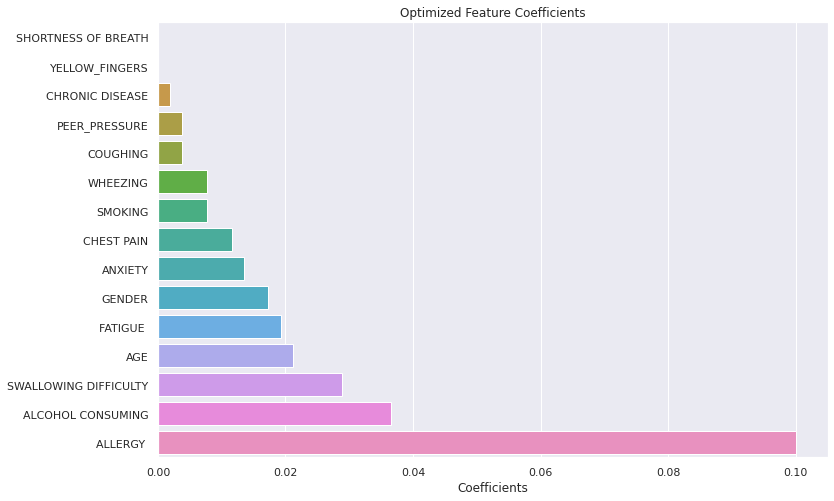

In [ ]:
# Assign Importance of features to variable
opt_model = GaussianNB(var_smoothing=.533669923120631)
opt_model.fit(X_train_resamp, y_train_resamp)
imps = permutation_importance(opt_model, X_test_resamp, y_test_resamp)
importances = abs(imps.importances_mean)

# Create DataFrame for Scoring
df_Scores = pd.DataFrame(data=importances, index=X_train_resamp.columns, columns=['Coefficients'])

# Order DataFrame
df_Scores = df_Scores.sort_values(by='Coefficients', ascending=True)

# Choose size of chart
plt.figure(figsize=(12,8))

# Plot Bar chart of important features
sns.barplot(data=df_Scores, 
            y=df_Scores.index, 
            x='Coefficients', 
            orient='h')

plt.title('Optimized Feature Coefficients')

display(df_Scores.sort_values(by='Coefficients', ascending=False))